# Script para plotar gráficos com séries temporais, a partir de saídas corrigidas do PurpleAir
Desenvolvido por Nicole Laureanti - nlaureanti@gmail.com

Bibliotecas utilizadas: cartopy, scipy

Tarefas: Concatenação de diferentes planilhas corrigidas do PurpleAir (saídas do script_conferedados) + leitura de coordenadas + Cálculo de valores médios, máximos e mínimos horários e diários + Interpolação dos dados utilizados + Plotagem dos gráficos


In [1]:
import pandas as pd    # conjunto de funções que se usa para dados em tabela (csv)
#https://pandas.pydata.org/docs/index.html
import matplotlib.pyplot as plt # conjunto de funções que se usa para plotagem 
#https://matplotlib.org/stable/index.html
import numpy as np #para trabalhar com vetores/arrays


import cartopy.crs as ccrs #para introduzir os eixos cartográficos

# Arquivos de entrada (preparando a execução):

In [5]:
fnames=['Ilha do Mel corrigido.csv',        'Reserva dos Papagaios corrigido.csv',
'Reserva das Águas corrigido.csv',              'RF 20211010-20211016 corrigido.csv',
'Reserva da Guaricica (outside) (-25.314958 -48.696156) Primary Real Time 05_05_2022 05_07_2022-corrigido.csv'
]
pasta_arq='./corrigidos_mapadecalor/'
name_estacao=["Ilha do Mel", "Reserva dos Papagaios", "Reserva das Águas", 
              "Receita Federal", "Reserva da Guaricica"]

In [6]:
#função para fazer a abertura dos arquivos
def get_data(f):
    try:
        df=pd.read_csv(f,
                      sep=',',header=0, index_col=0,
                       parse_dates=["dates"], na_values='NaN') #arquivo online
    except:
        df=pd.read_csv(f,
                      sep=',',header=0, index_col=0,
                       parse_dates=["UTCDateTime"], na_values='NaN') #arquivo do SD
    return df

# Leitura e organização dos dados 

In [10]:
#Crio o grid 
dfs=[]
for i in range(len(name_estacao)):
    print(name_estacao[i])
    dfs.append(get_data(pasta_arq+fnames[i]))
    

df_horario=[]
matrix_hourlymean={}; matrix_hourlymin={}; matrix_hourlymax={}
matrix_dailymean={}; matrix_dailymin={}; matrix_dailymax={}
for i in range(len(name_estacao)):
    datai=dfs[i].index[0] #utilize esses dois parmâetros para alterar a data de leitura
    dataf=dfs[i].index[-1]
    date_range=pd.date_range(start=datai,
                    end=dataf,
                    freq="h") #controla o nome dos arquivos/planilhas

    print(f"usando resample em {name_estacao[i]}")

    matrix_hourlymean[name_estacao[i]]=dfs[i].groupby(dfs[i].index.hour)['pm2.5'].mean()
    matrix_hourlymax[name_estacao[i]]=dfs[i].groupby(dfs[i].index.hour)['pm2.5'].max()
    matrix_hourlymin[name_estacao[i]]=dfs[i].groupby(dfs[i].index.hour)['pm2.5'].min()
    
    matrix_dailymean[name_estacao[i]]=dfs[i].resample('D')['pm2.5'].mean()
    matrix_dailymax[name_estacao[i]]=dfs[i].resample('D')['pm2.5'].max()
    matrix_dailymin[name_estacao[i]]=dfs[i].resample('D')['pm2.5'].min()
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html

Ilha do Mel
Reserva dos Papagaios
Reserva das Águas
Receita Federal
Reserva da Guaricica
usando resample em Ilha do Mel
usando resample em Reserva dos Papagaios
usando resample em Reserva das Águas
usando resample em Receita Federal
usando resample em Reserva da Guaricica


In [12]:
#Saida para verificação com as planilhas originais
for matrix in [matrix_hourlymean, matrix_dailymean]:
    [ print(f" {name_estacao[i]} \n {matrix[name_estacao[i]]} ") for i in range(len(name_estacao)) ]



 Ilha do Mel 
 dates
0     3.725393
1     3.489758
2     3.880637
3     3.535155
4     3.260472
5     3.619998
6     3.149062
7     3.703383
8     4.204173
9     4.482653
10    4.284421
11    3.763769
12    3.453157
13    5.291428
14    4.432514
15    3.776305
16    4.464348
17    4.832814
18    6.139427
19    5.598213
20    5.211405
21    4.415264
22    5.092327
23    4.285016
Name: pm2.5, dtype: float64 
 Reserva dos Papagaios 
 dates
0     2.016687
1     2.164176
2     2.259046
3     1.987270
4     1.906722
5     1.956799
6     1.913108
7     1.928816
8     2.495401
9     2.950328
10    2.908980
11    2.130379
12    3.231216
13    2.703319
14    2.391772
15    2.453920
16    2.475219
17    2.311022
18    2.310788
19    2.599396
20    2.815876
21    2.793877
22    2.613963
23    2.171347
Name: pm2.5, dtype: float64 
 Reserva das Águas 
 dates
0     2.757900
1     2.462371
2     2.156647
3     1.966891
4     1.640342
5     1.420373
6     1.352740
7     1.742773
8     2.393809
9     3.

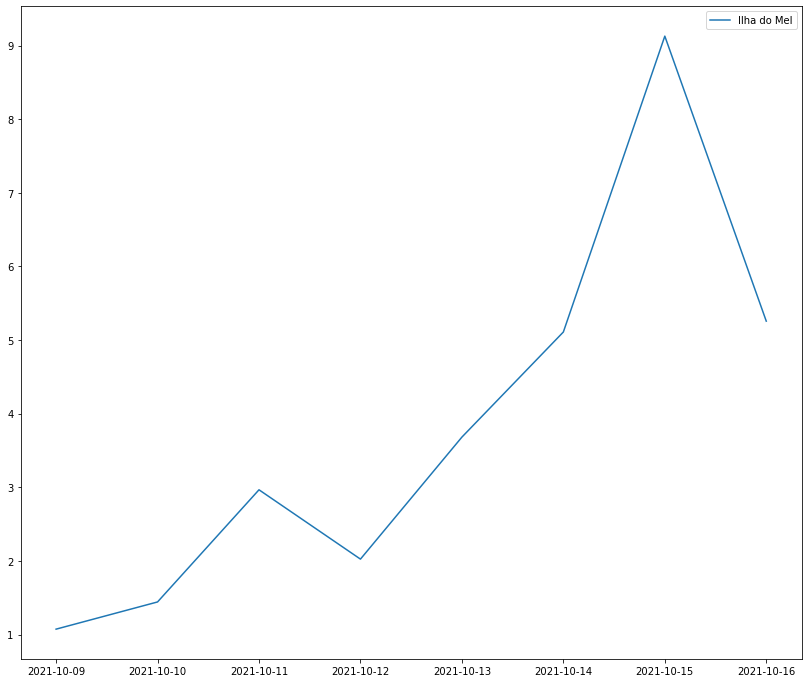

In [17]:
fig = plt.figure(figsize=(14, 12)) 
ax = plt.axes()

i=0
x=matrix[name_estacao[i]].index
y=matrix[name_estacao[i]]
label=name_estacao[i]

ax.plot(x,y,label=label)
ax.legend()